# Modeling

## 1. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datime
import seaborn as sns

sns.set(color_codes=True)

## 2. Loading dataset

In [2]:
df = pd.read_csv('data\data_for_predictions.csv',usecols=lambda x:x != 'Unnamed: 0')
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,...,7,19,0,0,1,0,0,0,0,1
14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,...,40,4,0,0,1,0,0,0,0,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,...,46,10,0,0,1,0,0,0,0,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,...,40,4,0,0,1,0,0,0,0,1


## 3. Modeling

In [3]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
train_df = df.copy()

y = train_df['churn']
X = train_df.drop(columns=['id','churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [6]:
model = RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [7]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9041621029572837

Even though the accuracy is around 90%, since our classes are imbalanced, accuracy alone will not be a reliable metric for evaluating our predictor feature.

## Evaluation

In [8]:
tn,fp,fn,tp = metrics.confusion_matrix(y_test,y_pred).ravel()
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [9]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

True positives: 20
False positives: 4
True negatives: 3282
False negatives: 346

Accuracy: 0.9041621029572837
Precision: 0.8333333333333334
Recall: 0.0546448087431694


## Feature Importance

In [13]:
feature_importance = pd.DataFrame({
    'features' : X_train.columns,
    'importance' : model.feature_importances_
}).sort_values(by='importance',ascending=True).reset_index()

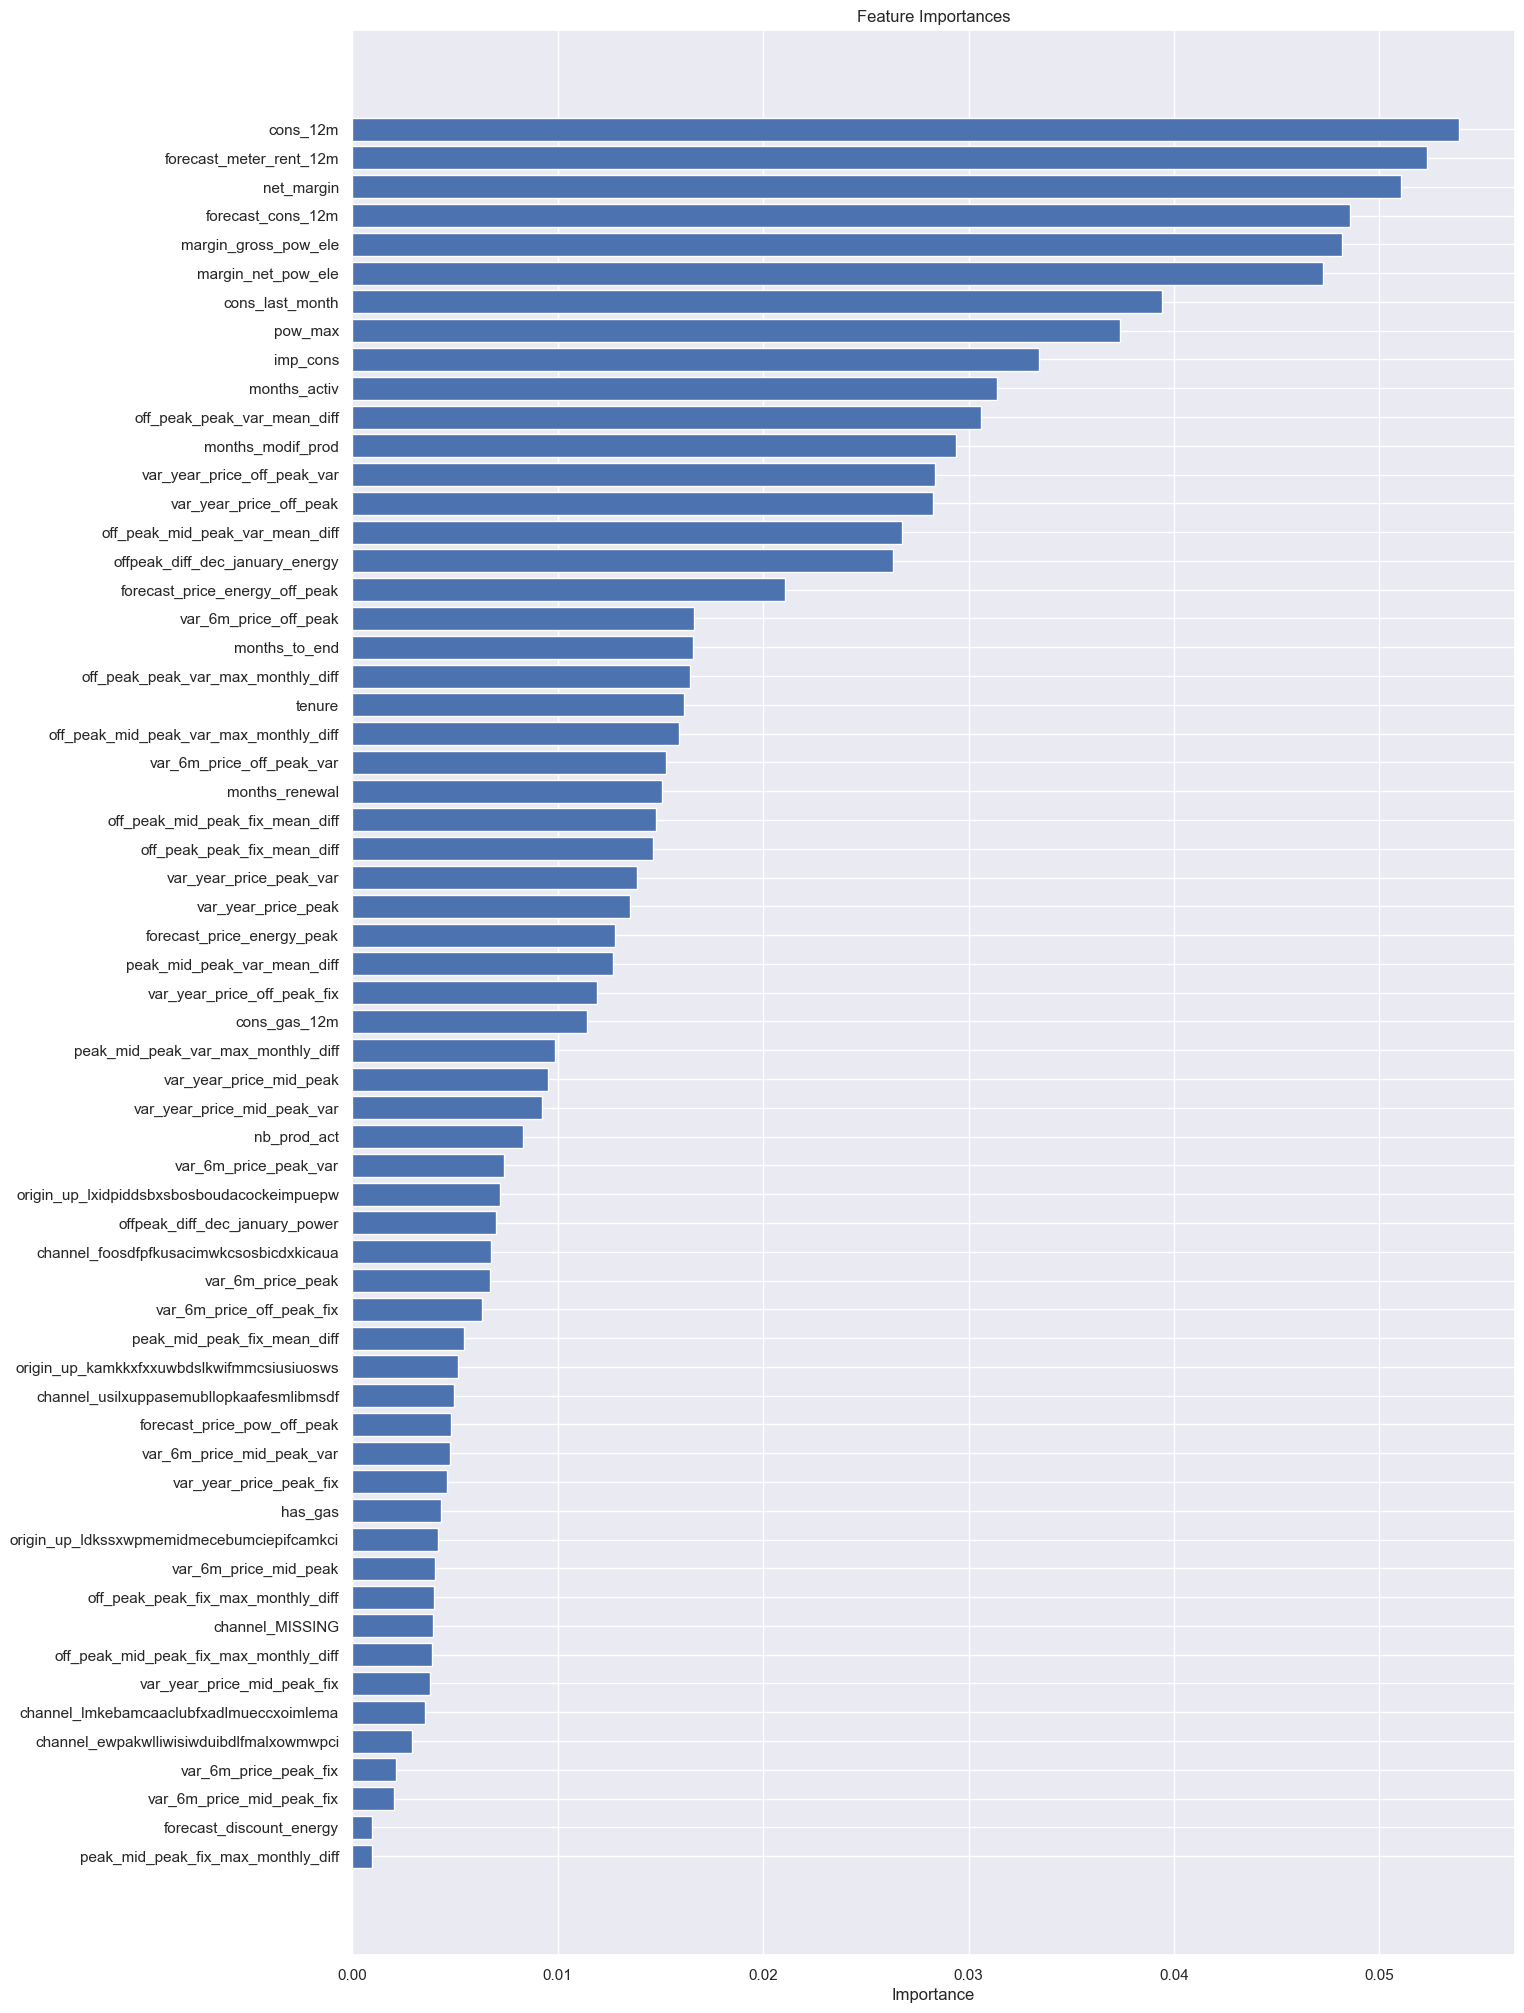

In [16]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='b', align='center')
plt.yticks(range(len(feature_importance)), feature_importance['features'])
plt.xlabel('Importance')
plt.show()

We can observe that while price sensitivity features are scattered, they are not the main features that support our hypothesis.